In [1]:
#website UI and conspiracy theory classifier


# TF-IDF (can try )
#add / separate data (url useless , separate words)
# try break urls e.g. https:\/\/www.zerohedge.com muight be conspiracy theory
# tokenizer for sklearn before tfidf
# concat the features into 1 set, instead of many features.
# split into multiple trainign samples. 1 long para , split into eg 20 samples for training.

# apply classifier to all sentences in the whole doc, is it 50%> is conspiracy (consistency) even if the article is conspiracy? find accuracy.

#highlight where things ai thinks that are consp, 

#may experiment with chatgpt test if gives useful answers

#if does, api ..to json to user interface

#maybe heatmap visualisation
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_json('yt_training_set.json')

df = pd.DataFrame(df)
print(df)

                                                         title  \
60Bp0qJvvqA  The Second Book of Enoch (Human Voice, Read-Al...   
KP6SZFQUDTs  Pastor David Lynn Schools a Muslim On Isaiah 4...   
SOpvCubaIx0  Obama's Best Comebacks and Rebuttal Moments - ...   
Cb1EDmVtg5M  BLACK MAN in a MAGA Hat & American Exceptional...   
P3hY1eagq88                       Reagan Warned Us About Obama   
...                                                        ...   
6Ib-K5nf_Ag        Chair Pulling Pranks (Gone Wrong) - 2018 !!   
-7SsM4Q69Yo  Firefighters Laugh At Inappropriate Moments (E...   
rXj6MMurcOk  Joshua Kutuny: Aaron Cheruiyot is not aware of...   
lDbW2PpuOPM  The Wandering Trader Update is BAD... so we ch...   
GvF2fIKik-M  Hurricane Dorian Scenarios: Breaking Down Stor...   

                   channel_title  view_count  \
60Bp0qJvvqA      Apocryphile1970   1051238.0   
KP6SZFQUDTs           SOCO Films   1145750.0   
SOpvCubaIx0         Epic Moments   1086910.0   
Cb1EDmVtg5M    

In [3]:
headers = df.keys()
print(headers)

Index(['title', 'channel_title', 'view_count', 'tags', 'description', 'label'], dtype='object')


In [4]:
# Specify the columns (categories) from which you want to drop rows with missing values
columns_to_dropna = ["title", "channel_title", "view_count", "tags", "description", "label"]

# Use the dropna method with how='any' to drop rows with missing values from the specified columns
filtered_data = df.dropna(subset=columns_to_dropna, how='any')

# print(filtered_data)
new_df=pd.DataFrame(filtered_data)



new_dataframe= pd.DataFrame({'title': new_df["title"].values,"channel_title": new_df["channel_title"].values,"view_count":new_df["view_count"].values,"tags":new_df["tags"].values,"description":new_df["description"].values,'label': new_df["label"].values})
print(new_dataframe)
new_df=new_dataframe

                                                 title  \
0    The Second Book of Enoch (Human Voice, Read-Al...   
1    Obama's Best Comebacks and Rebuttal Moments - ...   
2    BLACK MAN in a MAGA Hat & American Exceptional...   
3                         Reagan Warned Us About Obama   
4    TRUMP'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS ...   
..                                                 ...   
993        Chair Pulling Pranks (Gone Wrong) - 2018 !!   
994  Firefighters Laugh At Inappropriate Moments (E...   
995  Joshua Kutuny: Aaron Cheruiyot is not aware of...   
996  The Wandering Trader Update is BAD... so we ch...   
997  Hurricane Dorian Scenarios: Breaking Down Stor...   

               channel_title  view_count  \
0            Apocryphile1970   1051238.0   
1               Epic Moments   1086910.0   
2            Y.G. NYGHTSTORM    873200.0   
3                Calvin King  19999350.0   
4    The Josh Bernstein Show    825281.0   
..                       ...         ..

In [5]:



# Convert the data to a pandas DataFrame
df_concat = pd.DataFrame(columns=["text", "label"])


for entry in new_df.index:
    
    title=new_df["title"].get(entry) 
    # print(title)
    
    channel_title=new_df["channel_title"].get(entry)
    
    tags=" ".join(new_df["tags"].get(entry ,[]))
    description=new_df["description"].get(entry)
    
    label=new_df["label"].get(entry)

    
    

    concat_text = f"{title} {channel_title} {tags} {description}"
    concat_text=re.sub("(http\S+)", "", concat_text)
    
    df_concat = df_concat.append({"text": concat_text, "label": label}, ignore_index=True)
df_concat.to_excel('output_file.xlsx', index=False)
df_concat

C:\Users\zacha\AppData\Local\Temp\ipykernel_10768\15668610.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append({"text": concat_text, "label": label}, ignore_index=True)
C:\Users\zacha\AppData\Local\Temp\ipykernel_10768\15668610.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append({"text": concat_text, "label": label}, ignore_index=True)
C:\Users\zacha\AppData\Local\Temp\ipykernel_10768\15668610.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append({"text": concat_text, "label": label}, ignore_index=True)
C:\Users\zacha\AppData\Local\Temp\ipykernel_10768\15668610.py:23: FutureWarning: The frame.append method is deprecated and will be remov

,text,label
0,"The Second Book of Enoch (Human Voice, Read-Al...",-1
1,Obama's Best Comebacks and Rebuttal Moments - ...,-1
2,BLACK MAN in a MAGA Hat & American Exceptional...,-1
3,Reagan Warned Us About Obama Calvin King Obama...,-1
4,TRUMP'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS ...,-1
...,...,...
993,Chair Pulling Pranks (Gone Wrong) - 2018 !! Ji...,-1
994,Firefighters Laugh At Inappropriate Moments (E...,-1
995,Joshua Kutuny: Aaron Cheruiyot is not aware of...,-1
996,The Wandering Trader Update is BAD... so we ch...,-1


In [6]:

X = df_concat["text"]
print (X)


# The 'label' column contains the target labels
y = df_concat['label']
print(y)



0      The Second Book of Enoch (Human Voice, Read-Al...
1      Obama's Best Comebacks and Rebuttal Moments - ...
2      BLACK MAN in a MAGA Hat & American Exceptional...
3      Reagan Warned Us About Obama Calvin King Obama...
4      TRUMP'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS ...
                             ...                        
993    Chair Pulling Pranks (Gone Wrong) - 2018 !! Ji...
994    Firefighters Laugh At Inappropriate Moments (E...
995    Joshua Kutuny: Aaron Cheruiyot is not aware of...
996    The Wandering Trader Update is BAD... so we ch...
997    Hurricane Dorian Scenarios: Breaking Down Stor...
Name: text, Length: 998, dtype: object
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
993    -1
994    -1
995    -1
996    -1
997    -1
Name: label, Length: 998, dtype: object


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
print(y_train_encoded)


[0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 

In [8]:
# Check for NaN values in X_train and y_train

NaN_exists = y_train.isnull().values.any()
 

if NaN_exists:
    print("NaN in xtrain exists .")

In [9]:
print(X_train_tfidf)

  (0, 556)	0.05384996783880272
  (0, 506)	0.04896031032899658
  (0, 612)	0.03550330590021273
  (0, 534)	0.027744972157984125
  (0, 741)	0.040556696764378605
  (0, 693)	0.11711362101867728
  (0, 184)	0.05229986835035666
  (0, 861)	0.05941709308010667
  (0, 674)	0.03277716994939881
  (0, 20)	0.0428861830092848
  (0, 378)	0.2855581540789244
  (0, 699)	0.1840690224561196
  (0, 855)	0.08008135674598617
  (0, 102)	0.03748401261993473
  (0, 746)	0.8448477665915374
  (0, 853)	0.36210831547931627
  (1, 828)	0.2430664934290263
  (1, 949)	0.1779778978746032
  (1, 379)	0.25386790386526864
  (1, 448)	0.31445173697384265
  (1, 655)	0.28350486044177475
  (1, 799)	0.21592964084052532
  (1, 859)	0.2783070187261001
  (1, 352)	0.30612765865768515
  (1, 53)	0.6381429576666009
  :	:
  (795, 154)	0.030400451486958125
  (795, 853)	0.10558726028850415
  (796, 85)	0.808192357513626
  (796, 943)	0.2535890161743018
  (796, 420)	0.20110984684463665
  (796, 345)	0.26088279218446764
  (796, 478)	0.2442961806937578


In [10]:
# consp_classifier = LogisticRegression()
consp_classifier = MultinomialNB()

#classifier training
consp_classifier.fit(X_train_tfidf, y_train_encoded)

MultinomialNB()

Accuracy: 0.74
Precision: 0.7976190476190477
Recall: 0.6568627450980392
F1 Score: 0.7204301075268816
ROC-AUC: 0.8336334533813525


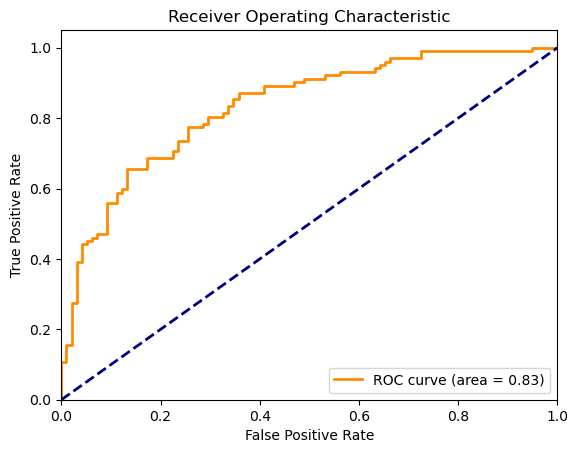

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,confusion_matrix
import matplotlib.pyplot as plt



y_pred = consp_classifier.predict(X_test_tfidf)

# performance metrics: 
# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_encoded, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_encoded, y_pred)
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test_encoded, y_pred)
print(f"F1 Score: {f1}")

# ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, consp_classifier.predict_proba(X_test_tfidf)[:, 1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fp, tp, thresholds = roc_curve(y_test_encoded, consp_classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fp, tp)

plt.figure()
plt.plot(
        fp, 
        tp, 
        color='darkorange',
        lw=2, 
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [12]:
import joblib

# Save the TF-IDF vectorizer model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Save the model
joblib.dump(consp_classifier, 'consp_classifier.joblib')



['consp_classifier.joblib']

In [13]:
# from sklearn.model_selection import GridSearchCV

# # Define a parameter grid to search over
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
# }

# # Create a grid search
# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',  # You can change the scoring metric as needed
#     n_jobs=-1,  # Use all available CPU cores for faster searching
# )

# # Fit the grid search to your data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters found during the search
# best_params = grid_search.best_params_

# # Train a RandomForestClassifier with the best hyperparameters
# best_consp_classifier = RandomForestClassifier(random_state=42, **best_params)
# best_consp_classifier.fit(X_train, y_train)

# # Predict on the test set using the best classifier
# y_pred = best_consp_classifier.predict(X_test)

# # Calculate performance metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, best_consp_classifier.predict_proba(X_test)[:, 1])

# print("Best Hyperparameters:", best_params)
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print(f"ROC-AUC: {roc_auc}")


